# Predicting Employee Productivity Using Tree Models

In this project we'll be predicting employee productivity using Classification Decision Tree and Random Forest Modeling in Python. We'll be working with the dataset _Productivity Prediction of Garment Employees_ from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees).

To get an idea of the sort of demand for predicting employee productivity, here is the offical summary of the dataset:

> _The garment industry is one of the key examples of the industrial globalization of the modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision-makers in the garments industry to track, analyze, and predict the productivity performance of the working teams in their factories._

Let's dive right into the exploration of the data.

# Dataset Exploration

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

In [2]:
# Loading in the data
df = pd.read_csv('garments_worker_productivity.csv')

In [3]:
# Size and preview of df
print(df.shape)
df.head()

(1197, 15)


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


There are `1197` rows and `15` columns.

__Below is a description of the features and our target variable.__

`date`: date in MM-DD-YYYY

`quarter`: a portion of the month — month was divided into four quarters

`department`: associated department with the instance

`day`: day of the week

`team`: associated team number with the instance

`targeted_productivity`: targeted productivity set by the authority for each team for each day

`smv`: standard minute value — the allocated time for a task

`wip`: work in progress — includes the number of unfinished items for products

`over_time`: represents the amount of overtime by each team in minutes

`incentive`: represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action

`idle_time`: the duration of time when the production was interrupted due to several reasons

`idle_men`: the number of workers who were idle due to production interruption

`no_of_style_change`: number of changes in the style of a particular product

`no_of_workers`: number of workers on each team

`actual_productivity`: the actual % of productivity that was delivered by the workers — it ranges from 0 to 1. Our target variable.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

There are 506 missing values from the `wip` feature. Also the top 4 features are object dtypes; the rest are numerical.

In [5]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


There's a bunch of interesting things we can learn from these general statistics. 

* Maximum `wip` is 23,122! This means there was 23,122 items unfinished for products at that given day.
* There doesn't seem to be much going on in the `idle_time` and `idle_men` columns. Most of the values seem to have a value of zero. Meaning that time management seemed to be pretty effecient.
* For the `no_of_style_changes` column, there are not many style changes to certain products.
* `actual_productivity`, our target variable, has at least one column that surpasses the limit of 1 which is indicated in the dataset description.

Now we're going to look at each column individually to check if anything stands out or needs addressing so we can make our model better.

## "date" column

In [6]:
# First five rows
df['date'].head()

0    1/1/2015
1    1/1/2015
2    1/1/2015
3    1/1/2015
4    1/1/2015
Name: date, dtype: object

In [7]:
# Last five rows
df['date'].tail()

1192    3/11/2015
1193    3/11/2015
1194    3/11/2015
1195    3/11/2015
1196    3/11/2015
Name: date, dtype: object

In [8]:
# Sample of 20 different rows to see differnet dates
df['date'].sample(20, random_state=1)

886     2/23/2015
1093     3/7/2015
801     2/16/2015
189     1/11/2015
808     2/17/2015
480     1/28/2015
202     1/12/2015
311     1/18/2015
866     2/22/2015
752     2/14/2015
578      2/2/2015
135      1/8/2015
768     2/15/2015
1007     3/2/2015
195     1/12/2015
653      2/7/2015
310     1/18/2015
613      2/4/2015
888     2/23/2015
1041     3/3/2015
Name: date, dtype: object

The dates range from January 1st to March 11th of 2015. 

## "quarter" column

In [9]:
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

This column represents quarters of a month. Let's see what the dates are for quarter 5.

In [10]:
# Showing quarter 5's "dates" distribution 
df[df['quarter'] == 'Quarter5']['date'].value_counts()

1/31/2015    24
1/29/2015    20
Name: date, dtype: int64

Quarter5 has only the two dates. Could be a good idea to add these rows to quarter4.

## "department" column

In [11]:
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

There are two "finishing" values. This probably means there is an added space along the values. We can see using pandas' `unique()` function.

In [12]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

There is indeed an added space at the end of one of the `finishing` values. We'll go ahead and fix this problem later.

## "day" column

In [13]:
df['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

Since there is no missing data in this column, the factory seems to have Fridays off. 

## "team" column

In [14]:
# Sorting the teams in order
df['team'].value_counts().sort_index()

1     105
2     109
3      95
4     105
5      93
6      94
7      96
8     109
9     104
10    100
11     88
12     99
Name: team, dtype: int64

Most of the teams have similar amounts of observations, 12 teams in total.

## "targeted_productivity" vs "actual_productivity"

It's good to check these two columns out together. We'll be able to compare instances of productivity where targeted is more than actual and vice versa.

In [15]:
# Instances where targeted is greater than actual
df[df['targeted_productivity'] > df['actual_productivity']]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
11,1/1/2015,Quarter1,sweing,Thursday,10,0.75,19.31,578.0,6480,45,0.0,0,0,54.0,0.712205
12,1/1/2015,Quarter1,sweing,Thursday,5,0.80,11.41,668.0,3660,50,0.0,0,0,30.5,0.707046
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
16,1/1/2015,Quarter1,finishing,Thursday,7,0.80,2.90,NaN,960,0,0.0,0,0,8.0,0.540729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


There are 322 instances out of 1197 where the actual productivity didn't meet the targeted productivity quota. That's about 27% of the time.

In [16]:
# Instances where actual is greater than targeted
df[df['actual_productivity'] > df['targeted_productivity']]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


There are 869 instances out of 1197 where the actual productivity exceeded the targeted productivity. That's about 72% of the time. 

In [17]:
# Instances where targeted is equal to actual
df[df['targeted_productivity'] == df['actual_productivity']]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
163,1/10/2015,Quarter2,sweing,Saturday,10,0.8,28.08,1082.0,10530,63,0.0,0,0,58.5,0.8
182,1/11/2015,Quarter2,sweing,Sunday,2,0.8,28.08,805.0,10530,63,0.0,0,0,58.5,0.8
183,1/11/2015,Quarter2,sweing,Sunday,10,0.8,28.08,762.0,10530,38,0.0,0,0,58.5,0.8
207,1/12/2015,Quarter2,sweing,Monday,2,0.8,28.08,737.0,10530,63,0.0,0,0,58.5,0.8
229,1/13/2015,Quarter2,sweing,Tuesday,2,0.8,28.08,723.0,10530,50,0.0,0,0,58.5,0.8
855,2/19/2015,Quarter3,sweing,Thursday,8,0.7,29.40,1116.0,6240,0,0.0,0,2,57.0,0.7


Only 6 instances where the targeted and actual productivity were equal.

Now let's check and see where the actual productivity is greater than 1 despite the dataset description stating 1 was the limit.

In [18]:
# Instances where actual productivity is greater than 1
actual_over_one = df[df['actual_productivity'] > 1]

# Printing the amount of instances
print(actual_over_one.shape[0])
actual_over_one

37


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
337,1/20/2015,Quarter3,finishing,Tuesday,5,0.70,4.15,NaN,1440,0,0.0,0,0,8.0,1.033570
437,1/26/2015,Quarter4,finishing,Monday,3,0.75,3.94,NaN,1800,0,0.0,0,0,10.0,1.059621
456,1/27/2015,Quarter4,sweing,Tuesday,2,0.75,22.52,1635.0,6840,119,0.0,0,0,57.0,1.000230
457,1/27/2015,Quarter4,sweing,Tuesday,3,0.75,22.52,1299.0,6840,119,0.0,0,0,57.0,1.000230
477,1/28/2015,Quarter4,sweing,Wednesday,2,0.80,22.52,1559.0,6840,90,0.0,0,0,57.0,1.000230
478,1/28/2015,Quarter4,sweing,Wednesday,3,0.80,22.52,1350.0,6840,113,0.0,0,0,57.0,1.000230
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
518,1/31/2015,Quarter5,sweing,Saturday,3,0.80,22.52,1136.0,6960,113,0.0,0,0,58.0,1.000457
519,1/31/2015,Quarter5,sweing,Saturday,2,0.80,22.52,1397.0,6840,113,0.0,0,0,57.0,1.000230
542,2/1/2015,Quarter1,finishing,Sunday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,1.011562


There are 37 instances where actual productivity exceeds 1. 

## "smv" column

In [19]:
df['smv'].value_counts(bins=5)

(2.847, 13.232]     577
(13.232, 23.564]    318
(23.564, 33.896]    284
(44.228, 54.56]      11
(33.896, 44.228]      7
Name: smv, dtype: int64

This column shows that most tasks were completed between 2.847 minutes and 13.232 minutes. Not many tasks are taking longer than 44 minutes to complete.

## "wip" column

This "wip" column is the only column with missing data. Let's look at the instances where the data is missing.

In [20]:
df[df['wip'].isnull()]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


Not much we can do with all this missing data.

## "over_time" column

This column represents the amount of overtime by each team in minutes. Remember there is a wide range of values in this column.

In [21]:
df['over_time'].describe()

count     1197.000000
mean      4567.460317
std       3348.823563
min          0.000000
25%       1440.000000
50%       3960.000000
75%       6960.000000
max      25920.000000
Name: over_time, dtype: float64

Let's see how many instances there are when over time is greater than our 50% mark 3,960.

In [22]:
# Instances when over time is greater than 3960
df[df['over_time'] > 3960]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


About half of our instances required a good amount of over time, more than 3,960 minutes!  

In [23]:
# Instances when over time is 0
df[df['over_time'] == 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
684,2/9/2015,Quarter2,sweing,Monday,11,0.75,10.05,103.0,0,45,0.0,0,0,54.0,0.750648
694,2/10/2015,Quarter2,sweing,Tuesday,10,0.80,22.52,1268.0,0,88,0.0,0,0,56.0,0.900632
695,2/10/2015,Quarter2,sweing,Tuesday,1,0.80,22.52,1546.0,0,88,0.0,0,0,57.0,0.900471
696,2/10/2015,Quarter2,sweing,Tuesday,3,0.80,22.52,813.0,0,88,0.0,0,0,57.0,0.900471
697,2/10/2015,Quarter2,sweing,Tuesday,2,0.80,22.52,1512.0,0,88,0.0,0,0,57.0,0.899984
713,2/11/2015,Quarter2,sweing,Wednesday,2,0.80,22.52,1557.0,0,90,0.0,0,0,57.5,1.000345
714,2/11/2015,Quarter2,sweing,Wednesday,1,0.80,22.52,1498.0,0,113,0.0,0,0,57.0,1.000066
718,2/11/2015,Quarter2,sweing,Wednesday,10,0.80,22.52,598.0,0,75,0.0,0,0,56.0,0.850365
730,2/12/2015,Quarter2,sweing,Thursday,1,0.80,22.52,1397.0,0,138,0.0,0,0,57.0,1.100484
732,2/12/2015,Quarter2,sweing,Thursday,2,0.80,22.52,1327.0,0,113,0.0,0,0,57.5,1.000345


In [24]:
# Length of the 0 mask
df[df['over_time'] == 0].shape[0]

31

Wow, only 31 instances when over time was not used! 

In [25]:
# Instances where over time is 0 and actual productivity meets or exceeds targeted
df[(df['over_time'] == 0) & (df['actual_productivity'] >= df['targeted_productivity'])]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
684,2/9/2015,Quarter2,sweing,Monday,11,0.75,10.05,103.0,0,45,0.0,0,0,54.0,0.750648
694,2/10/2015,Quarter2,sweing,Tuesday,10,0.80,22.52,1268.0,0,88,0.0,0,0,56.0,0.900632
695,2/10/2015,Quarter2,sweing,Tuesday,1,0.80,22.52,1546.0,0,88,0.0,0,0,57.0,0.900471
696,2/10/2015,Quarter2,sweing,Tuesday,3,0.80,22.52,813.0,0,88,0.0,0,0,57.0,0.900471
697,2/10/2015,Quarter2,sweing,Tuesday,2,0.80,22.52,1512.0,0,88,0.0,0,0,57.0,0.899984
713,2/11/2015,Quarter2,sweing,Wednesday,2,0.80,22.52,1557.0,0,90,0.0,0,0,57.5,1.000345
714,2/11/2015,Quarter2,sweing,Wednesday,1,0.80,22.52,1498.0,0,113,0.0,0,0,57.0,1.000066
718,2/11/2015,Quarter2,sweing,Wednesday,10,0.80,22.52,598.0,0,75,0.0,0,0,56.0,0.850365
730,2/12/2015,Quarter2,sweing,Thursday,1,0.80,22.52,1397.0,0,138,0.0,0,0,57.0,1.100484
732,2/12/2015,Quarter2,sweing,Thursday,2,0.80,22.52,1327.0,0,113,0.0,0,0,57.5,1.000345


Most of the time when actual productivity meets or exceeds targeted productivity, there involves over time!

## "incentive" column

In [26]:
df[df['incentive'] > 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


Just under half of instances (593) have some amount of incentive.

In [27]:
# Instances where incentive is > 0 and actual productivity meets or exceeds targeted
df[(df['incentive'] > 0) & (df['actual_productivity'] >= df['targeted_productivity'])]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


Of those 593 instances with some incentive, 540 of them met or exceeded their targeted productivity. 

## "idle_time" & "idle_men" columns

These columns represent the duration of time when the production was interrupted and the number of workers who were idle during that interruption respectively. There shouldn't be a value greater than zero in one column without the other column. Let's check if the data stands correct.

In [28]:
df[(df['idle_time'] == 0) & (df['idle_men'] > 0)]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


Looks like all the instances are correct in these columns.

In [29]:
# Instances of idle time greater than zero
df[df['idle_time'] > 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
615,2/4/2015,Quarter1,sweing,Wednesday,5,0.65,30.10,326.0,5820,0,90.0,10,0,58.5,0.650835
617,2/4/2015,Quarter1,sweing,Wednesday,4,0.35,30.10,287.0,6060,23,150.0,15,0,55.5,0.350706
650,2/7/2015,Quarter1,sweing,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0,0.662270
654,2/7/2015,Quarter1,sweing,Saturday,8,0.70,24.26,652.0,6840,0,300.0,37,0,57.0,0.365319
775,2/15/2015,Quarter3,sweing,Sunday,8,0.70,30.10,507.0,5880,40,2.0,10,1,59.0,0.700573
798,2/16/2015,Quarter3,sweing,Monday,8,0.70,30.10,7.0,7080,27,2.0,10,2,59.0,0.621972
818,2/17/2015,Quarter3,sweing,Tuesday,8,0.60,29.40,179.0,0,23,5.0,30,2,58.0,0.600983
822,2/17/2015,Quarter3,sweing,Tuesday,10,0.65,18.22,741.0,0,0,8.0,35,1,49.0,0.302117
841,2/18/2015,Quarter3,sweing,Wednesday,10,0.70,19.68,1119.0,5640,0,8.0,35,1,47.0,0.303574
843,2/18/2015,Quarter3,sweing,Wednesday,8,0.65,29.40,962.0,4560,0,4.5,30,2,57.0,0.251399


In [30]:
# Length of the above mask
df[df['idle_time'] > 0].shape[0]

18

Again, there's not many instances of idle time being greater than zero, only 18! 

In [31]:
# Instances when idle time > 0 and actual productivity doesn't meet targeted
df[(df['idle_time'] > 0) & (df['actual_productivity'] < df['targeted_productivity'])]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
650,2/7/2015,Quarter1,sweing,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0,0.662270
654,2/7/2015,Quarter1,sweing,Saturday,8,0.70,24.26,652.0,6840,0,300.0,37,0,57.0,0.365319
798,2/16/2015,Quarter3,sweing,Monday,8,0.70,30.10,7.0,7080,27,2.0,10,2,59.0,0.621972
822,2/17/2015,Quarter3,sweing,Tuesday,10,0.65,18.22,741.0,0,0,8.0,35,1,49.0,0.302117
841,2/18/2015,Quarter3,sweing,Wednesday,10,0.70,19.68,1119.0,5640,0,8.0,35,1,47.0,0.303574
843,2/18/2015,Quarter3,sweing,Wednesday,8,0.65,29.40,962.0,4560,0,4.5,30,2,57.0,0.251399
848,2/19/2015,Quarter3,sweing,Thursday,5,0.80,30.10,276.0,600,63,3.5,15,0,59.5,0.799983
860,2/19/2015,Quarter3,sweing,Thursday,7,0.75,30.10,444.0,0,0,5.0,20,1,59.0,0.611141
880,2/22/2015,Quarter4,sweing,Sunday,7,0.75,30.10,627.0,6960,0,3.5,20,1,58.0,0.393549
882,2/22/2015,Quarter4,sweing,Sunday,5,0.80,30.10,450.0,5700,0,4.5,25,0,60.0,0.307501


In [32]:
# Length of the above mask
df[(df['idle_time'] > 0) & (df['actual_productivity'] < df['targeted_productivity'])].shape[0]

14

Of the 18 instances when idle time is greater than zero, 14 instances never met the targeted productivity goal.

## "no_of_style_change" column

In [33]:
df['no_of_style_change'].value_counts()

0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64

Style changes would only happen at most twice per team on a given day. Most of the time, 1050 instances, styles never changed. 

In [34]:
# Instances when there is a style change and actual productivity never met targeted 
df[(df['no_of_style_change'] > 0) & (df['actual_productivity'] < df['targeted_productivity'])].shape[0]

41

When the number of style changes are greater than zero (147 of them), 41 instances of actual productivity never met the targeted productivity. That's 41 out of 147, about 27%. Which means, __when there is a style change__, it doesn't slow down the teams significantly.

## "no_of_workers" column

In [35]:
df['no_of_workers'].describe()

count    1197.000000
mean       34.609858
std        22.197687
min         2.000000
25%         9.000000
50%        34.000000
75%        57.000000
max        89.000000
Name: no_of_workers, dtype: float64

The mean and the median are around 34 workers per team. 

In [36]:
df['no_of_workers'].value_counts(bins=5).sort_index()

(1.9120000000000001, 19.4]    479
(19.4, 36.8]                  142
(36.8, 54.2]                   87
(54.2, 71.6]                  488
(71.6, 89.0]                    1
Name: no_of_workers, dtype: int64

A heavy amount of instances were teams having under 20 people and teams with 54 to 72 people. Teams were either smaller of larger, not really inbetween like our mean and median.

# Data Cleaning 

### "date" column

Let's start from the top again with the `date` column. With the dates ranging from January thru March, and not for the entire year instead, I don't think that there is enough dates here to make a significant impact for our decision tree. For instance, certain seasonal months could have an effect on productivity. So let's go ahead and drop this column from the dataset.

In [37]:
# Dropping 'date' column
df = df.drop('date', axis=1)

### "quarter" column

Next we have the `quarter` column. quarter5 has only 44 instances; it's only representing two dates. We're going to add Quarter5's instances to Quarter4. Also, instead of using the word "Quarter" for each value, we'll use integers only to represent each quarter.

In [38]:
# Replacing Quarter5 to Quarter4
df['quarter'] = df['quarter'].str.replace('Quarter5', 'Quarter4')

In [39]:
# Replacing the word quarter and leaving only the integers, converting to int dtype
df['quarter'] = df['quarter'].str.replace('\D+', '', regex=True).astype(int)

In [40]:
df['quarter'].value_counts()

1    360
2    335
4    292
3    210
Name: quarter, dtype: int64

In [41]:
# Checking data type
df['quarter'].dtype

dtype('int64')

We'll also convert the quarter column to dummy columns. Dummy columns makes separate columns for each of the quarters. For example, if the instance is in quarter 3, then there will be a value of one in that column and the rest of the quarter columns will have a zero. The reason we do this is because if we left the column as is, our decision tree would think quarter 3 is greater than quarter 2 but in reality they represent different categories.

In [42]:
# Convert to dummies and drop quarter column
df = pd.concat([df, pd.get_dummies(df['quarter'], prefix='q')], axis=1).drop('quarter', axis=1)

df.sample(5, random_state=1)

,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,q_1,q_2,q_3,q_4
886,finishing,Monday,12,0.8,5.13,NaN,1080,0,0.0,0,0,9.0,0.902500,0,0,0,1
1093,sweing,Saturday,3,0.8,29.40,983.0,6840,63,0.0,0,1,57.0,0.800579,1,0,0,0
801,sweing,Monday,9,0.6,18.79,2103.0,5400,0,0.0,0,1,54.0,0.329965,0,0,1,0
189,finishing,Sunday,6,0.8,2.90,NaN,1440,0,0.0,0,0,8.0,0.597348,0,1,0,0
808,finishing,Tuesday,3,0.5,5.13,NaN,1800,0,0.0,0,0,15.0,0.786600,0,0,1,0


### "department" column

There's a few things to do to the `department` column. For one, we'll remove the extra space in the word "finishing ". Next we'll convert the column to integers by having a 1 represent "sweing" and a 0 represent "finishing". And we'll finish by renaming the column "dept_sweing".

In [43]:
# Removing the whitespace on finishing
df['department'] = df['department'].str.replace('\s', '', regex=True)

In [44]:
df['department'].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

In [45]:
# Replacing value to integers and renaming column
df['department'] = df['department'].replace({'sweing': 1, 'finishing': 0})
df = df.rename(columns={'department': 'dept_sweing'})

df.sample(5, random_state=1)

,dept_sweing,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,q_1,q_2,q_3,q_4
886,0,Monday,12,0.8,5.13,NaN,1080,0,0.0,0,0,9.0,0.902500,0,0,0,1
1093,1,Saturday,3,0.8,29.40,983.0,6840,63,0.0,0,1,57.0,0.800579,1,0,0,0
801,1,Monday,9,0.6,18.79,2103.0,5400,0,0.0,0,1,54.0,0.329965,0,0,1,0
189,0,Sunday,6,0.8,2.90,NaN,1440,0,0.0,0,0,8.0,0.597348,0,1,0,0
808,0,Tuesday,3,0.5,5.13,NaN,1800,0,0.0,0,0,15.0,0.786600,0,0,1,0


In [46]:
df['dept_sweing'].value_counts()

1    691
0    506
Name: dept_sweing, dtype: int64

### "day" column

We're going to dummy this column as well. That way we have numerical values which is better for our model.

In [47]:
# Convert to dummies and drop day column
df = pd.concat([df, pd.get_dummies(df['day'], prefix=None)], axis=1).drop('day', axis=1)

df.sample(5, random_state=1)

,dept_sweing,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,...,q_1,q_2,q_3,q_4,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
886,0,12,0.8,5.13,NaN,1080,0,0.0,0,0,...,0,0,0,1,1,0,0,0,0,0
1093,1,3,0.8,29.40,983.0,6840,63,0.0,0,1,...,1,0,0,0,0,1,0,0,0,0
801,1,9,0.6,18.79,2103.0,5400,0,0.0,0,1,...,0,0,1,0,1,0,0,0,0,0
189,0,6,0.8,2.90,NaN,1440,0,0.0,0,0,...,0,1,0,0,0,0,1,0,0,0
808,0,3,0.5,5.13,NaN,1800,0,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0


### 'team' column

We're also going to dummy this column; adding 12 more columns.

In [48]:
# Convert to dummies and drop team column
df = pd.concat([df, pd.get_dummies(df['team'], prefix='team')], axis=1).drop('team', axis=1)

df.sample(5, random_state=1)

,dept_sweing,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
886,0,0.8,5.13,NaN,1080,0,0.0,0,0,9.0,...,0,0,0,0,0,0,0,0,0,1
1093,1,0.8,29.40,983.0,6840,63,0.0,0,1,57.0,...,1,0,0,0,0,0,0,0,0,0
801,1,0.6,18.79,2103.0,5400,0,0.0,0,1,54.0,...,0,0,0,0,0,0,1,0,0,0
189,0,0.8,2.90,NaN,1440,0,0.0,0,0,8.0,...,0,0,0,1,0,0,0,0,0,0
808,0,0.5,5.13,NaN,1800,0,0.0,0,0,15.0,...,1,0,0,0,0,0,0,0,0,0


### "wip" column

With this column there are 506 missing values. We don't know whether the missing values were supposed to repesent zero unfinished products or if the data is simply missing. That being said, this column doesn't provide any value to us and we'll go ahead and remove it from the dataset.

In [49]:
# Dropping 'team' column
df = df.drop('wip', axis=1)

### "idle_time" & "idle_men" columns

There wasn't many times when the factory had idle time and men, 18 in total. What I liked about these columns is that 14 of these 18 instances was when actual productivity didn't meet targeted prodictivity. So when there was idle time, about 78% of the time the teams did not meet their productivity goal. Although those are odds are high, there is a small amount of instances compared to the dataset in a whole. We'll go ahead and remove these two columns.

In [50]:
# Dropping 'idle_time' and 'idle_men' columns
df = df.drop(['idle_time', 'idle_men'], axis=1)

### "no_of_style_change" column

There is only 147 instances of style changes to particular products. Of those 147 instances, 41 instances did not reach their targeted productivity. That's a mere 27%. It's not a significant number given how small the total amount of instances are compared to the dataset as a whole. We'll go ahead and remove this column. 

In [51]:
# Dropping "no_of_style_change" column
df = df.drop('no_of_style_change', axis=1)

### "no_of_workers" column

This column has a float data type instead of an interger data type. That's like saying there are 2.5 workers instead of 2 or 3. Let's convert this column to an integer data type.

In [52]:
# Converting to int dtype
df['no_of_workers'] = df['no_of_workers'].astype(int)

# Checking dtype
df['no_of_workers'].dtype

dtype('int64')

### "actual_productivity" column

We'll first round this column to two decimal places like the target productitvity column. We'll then, since we are building a classification tree and not a regression tree, create a categorical column to represent if actual productivity met or exeeded targeted productivity using true or false values. We'll name this column "productive".

After doing some rounding to the actual productivity column, we lose 22 instances from targeted productivity. So we will not round this column.

In [54]:
# Creating a new categorical target column 'productive'
df['productive'] = df['actual_productivity'] >= df['targeted_productivity']

df['productive'].value_counts()

True     875
False    322
Name: productive, dtype: int64

### Columns check

We've cleaned a lot of this data. We dropped some columns, we added some columns (via dummy). Let's see what columns we have now.

In [55]:
# Array of df column names
df.columns

Index(['dept_sweing', 'targeted_productivity', 'smv', 'over_time', 'incentive',
       'no_of_workers', 'actual_productivity', 'q_1', 'q_2', 'q_3', 'q_4',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'team_1', 'team_2', 'team_3', 'team_4', 'team_5', 'team_6', 'team_7',
       'team_8', 'team_9', 'team_10', 'team_11', 'team_12', 'productive'],
      dtype='object')

Before we start building our classification tree, let's reorder the columns so we can read the dataset a bit easier.

In [56]:
# Reordering columns
df = df[['dept_sweing', 'smv', 'over_time', 'incentive',
       'no_of_workers', 'q_1', 'q_2', 'q_3', 'q_4',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'team_1', 'team_2', 'team_3', 'team_4', 'team_5', 'team_6', 'team_7',
       'team_8', 'team_9', 'team_10', 'team_11', 'team_12', 
       'targeted_productivity', 'actual_productivity', 'productive']]

In [59]:
# Displaying a sample of cleaned dataset
df.sample(5, random_state=1)

,dept_sweing,smv,over_time,incentive,no_of_workers,q_1,q_2,q_3,q_4,Monday,...,team_6,team_7,team_8,team_9,team_10,team_11,team_12,targeted_productivity,actual_productivity,productive
886,0,5.13,1080,0,9,0,0,0,1,1,...,0,0,0,0,0,0,1,0.8,0.902500,True
1093,1,29.40,6840,63,57,1,0,0,0,0,...,0,0,0,0,0,0,0,0.8,0.800579,True
801,1,18.79,5400,0,54,0,0,1,0,1,...,0,0,0,1,0,0,0,0.6,0.329965,False
189,0,2.90,1440,0,8,0,1,0,0,0,...,1,0,0,0,0,0,0,0.8,0.597348,False
808,0,5.13,1800,0,15,0,0,1,0,0,...,0,0,0,0,0,0,0,0.5,0.786600,True


Time to build our tree!

# Building the Tree

To start building our classification decision tree we first need to import the libraries we'll be using to create our model. We then will separate our dataset into two sets, one with all of our features (columns) for our model, and the second with only the target variable, "productive".

We'll then split those two datasets into our train set, the set our model will train and learn on, and our test set, the unseen new data to evaluate our model's accuracy with. We'll do a split of 80-20, train to test. 

In [165]:
# Importing scikit learn libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Importing our visuals libraries
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
%matplotlib inline

In [62]:
# Model features and target variable
X = df.drop(['actual_productivity', 'productive'], axis=1)
y = df['productive']

In [63]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

We'll then instantiate our tree using a variety of parameters that will ultimately increase the accuracy of our model. Then we fit our traing data to our tree model and check the accuracy of our model using the test data. The accuacy score measures the correct predictions of the model over all the predictions (how many were correct).

In [180]:
# Instantiating the tree
tree = DecisionTreeClassifier(max_depth=3, 
                              min_samples_split=40, 
                              max_features=30, 
                              min_samples_leaf=4, 
                              random_state=1)

# Fitting training data
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=30, min_samples_leaf=4,
                       min_samples_split=40, random_state=1)

In [181]:
# Accuracy score on test set
score = tree.score(X_test, y_test)

print(f'Accuracy Score: {round(score, 2)}')

Accuracy Score: 0.78


We have an accuracy score of `0.78`, which isn't too bad to start with. Let's go ahead an visualize our tree and see what is happening.

# Visualizing and Evaluating the Tree

In [162]:
# To see the class order to transform them to ["Unproductive", "Productive"]
tree.classes_ 

array([False,  True])

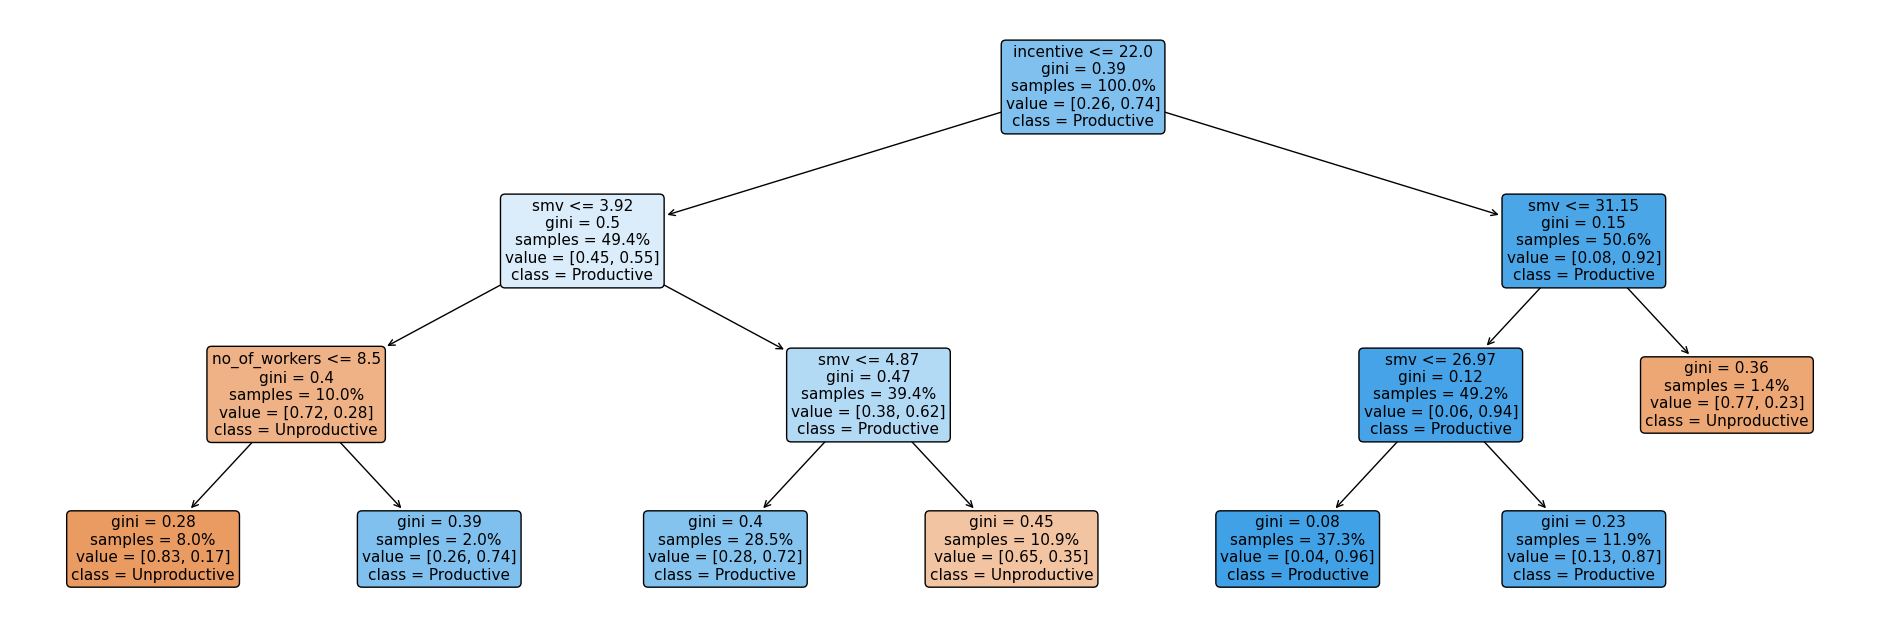

In [163]:
# Plotting the tree with plot size and parameters
plt.figure(figsize = [24.0 , 8.0])

_ = plot_tree(tree, 
              feature_names = list(X.columns),
              class_names = ['Unproductive', 'Productive'],
              filled = True,       
              proportion = True,
              precision = 2,
              rounded = True,
              fontsize = 11)

To read this decision tree is actually quite simple to do although it can look intimidating. Think of a decision tree like you would a family tree. You start with the head of the family at the top, but in our case the root node. Below the root node is two more nodes. And like a family tree those two nodes are called parent/child (nodes). They are a parent to the nodes below them and a child to the node above them. At the bottom of our tree are the leaf nodes which are exclusively child nodes. The leaves hold the final prediction of our model, "productive" or "unproductive". 

In the top of each box shows what feature is used as a threshold to get to the next node down the tree. As we can see, mainly "incentive" and "smv" with the exception of "no_of_workers" on the far left are the only feature thresholds needed for our decision tree. 

Let's use an example to help evaluate this tree. You can use any instances from the data but let's use a hypothetical scenario. Let's say we have an incentive of 20 and a smv of 4. We start at the top and compare our incentive value with the incentive threshold value given. So our `20 <= 22.0`, which is true. If its true we always follow the arrow to the left. If its false we always go to the right. So we're going to the left and we hit the next node that has a smv threshold. We compare our smv to the threshold. So our `4 <= 3.92`, which is false. So we go to the right and the next node has another smv threshold that we compare again. So our `4 <= 4.87`, which is true. So we go to the left and hit our final node, the leaf node. The class that our model predicted our hypothetical scenario is productive! 

As long as we have information on incentive, smv, and number of workers, we can predict whether a specific team will be productive or not.

Below is a bar graph showing the importance of each feature in our tree model.

Text(0.5, 1.0, 'Feature Importance for Employee Productivity Classification Tree')

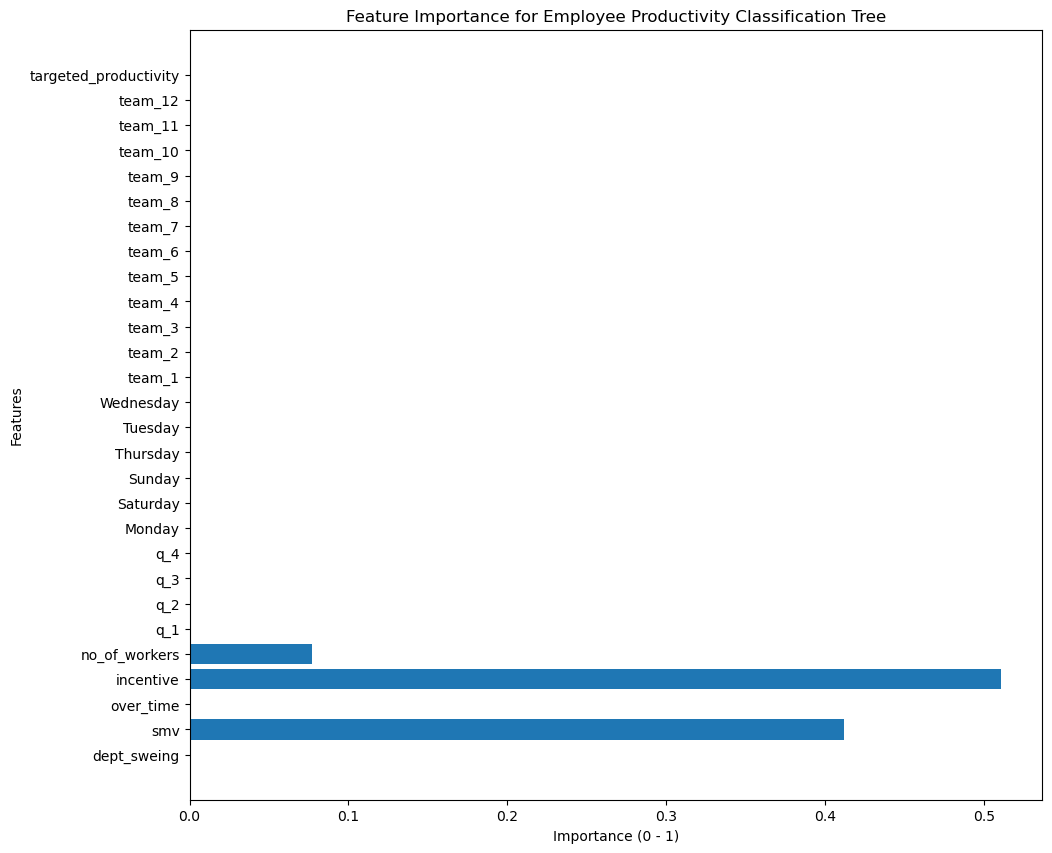

In [173]:
# Bar graph showing what features were used in model and how much
plt.figure(figsize=(11, 10))

plt.barh(tree.feature_names_in_,
         tree.feature_importances_)

plt.xlabel("Importance (0 - 1)")
plt.ylabel("Features")
plt.title("Feature Importance for Employee Productivity Classification Tree")

incentive has the most pull followed by smv. no_of_workers is used very little. 

# A Better Tree?

Let's do some tweaks to our decision tree parameters and see if we can get a better predicting model. We'll be using `GridSeachCV`. GridSearchCV allows us to try all the possible combinations from a list of arguments for each parameter. We'll be able to tell which parameters and score are the best for the model.

In [183]:
# Importing GridSearchCV library
from sklearn.model_selection import GridSearchCV

In [190]:
# Parameters to check
parameters = {'criterion': ['gini', 'entropy'], 
              'class_weight': [None, 'balanced'],
              'min_samples_split': [15, 30, 45],
              'max_depth': list(range(3, 7)),
              'min_samples_leaf': list(range(9, 19, 3))
             }

# Instatiating GridSearchCV using DecisionTreeClassifier and parameters
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=1),
                         param_grid = parameters,
                         scoring = 'accuracy',
                         n_jobs = -1
                        )

# Fitting grid_tree to our data
grid_tree.fit(X, y)

# Printing best parameters and score
print(f'Best Decision Tree Parameters: {grid_tree.best_estimator_}\n')

print(f'Best Accuracy Score: {round(grid_tree.best_score_, 2)}')

Best Decision Tree Parameters: DecisionTreeClassifier(max_depth=5, min_samples_leaf=12, min_samples_split=30,
                       random_state=1)

Best Accuracy Score: 0.8


We've got a score of `0.8` using the parameters criterion = "gini", class_weight = None, max_depth = 5, min_samples_leaf = 12, min_samples_split = 30.

Let's instantiate another decision tree but this time with our new parameters. Then we'll get the accuracy score using our test data once again.

In [196]:
# Instantiating the tree_v2
tree_v2 = DecisionTreeClassifier(max_depth=5, 
                              min_samples_split=12, 
                              max_features=30, 
                              min_samples_leaf=12, 
                              random_state=1)

# Fitting training data
tree_v2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=30, min_samples_leaf=12,
                       min_samples_split=12, random_state=1)

In [197]:
# Accuracy score for tree_v2 using test set
score_v2 = tree_v2.score(X_test, y_test)

print(f'Accuracy Score: {round(score_v2, 2)}')

Accuracy Score: 0.78


After using better parameters from our grid search, we still have a score of `0.78`.

We'll also evaluate our tree using cross validation. Cross validation works by dividing our dataset into a certain number of folds (the cv parameter) designated for train and test subsets. It also creates that many copies of the datasets where each copy will have a different set of instances. The algorithm will then iterate over the copies and provide accuracy scores for each.

Cross validation is used to compare our original score with other possible scores to make sure we didn't get our original score by chance.

In [198]:
# Importing cross validation library
from sklearn.model_selection import cross_val_score

In [223]:
# Instantiating cross validation using tree_v2
cv_scores = cross_val_score(tree_v2, X, y, cv=10, n_jobs=-1)

# Printing scores
print(f'Cross Validation Scores: {cv_scores.round(2)}')

Cross Validation Scores: [0.82 0.86 0.82 0.82 0.82 0.81 0.72 0.75 0.82 0.78]


In [224]:
# Mean of the cross validation scores
print(f'Mean Cross Validation Score: {cv_scores.mean().round(2)}')

Mean Cross Validation Score: 0.8


The mean of the cross validation score is `0.8`, an increase from our original score.

We'll also check out a confusion matrix on our data to see how many true negatives (top left), false positives (top right), false negatives (bottom left), and true positives (bottom right) we have.

In [226]:
# Import confusion matrix library
from sklearn.metrics import confusion_matrix

In [228]:
# Model predictions from test data
y_pred = tree_v2.predict(X_test)

# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 35,  35],
       [ 17, 153]])

We have `35 true negatives` (instances where the class is correctly not predicted), `35 false positives` (instances where the class is actually absent, but the model wrongly predicts that it's present), `17 false negatives` (instances where the class is actually present, but the model wrongly predicts that it's absent), and `153 true positives` (instances where the class is correctly predicted). 

We use the confusion matrix to show how well in each metric did compared with the others.

# Using Random Forest

One last check we can do to compare and validate our results from our tree model is to use random forest. Random forest constructs multiple decision trees during training using various subsets and outputs the highest average accuracy. We'll be using the default amount of trees, 100, for our random forest model.

In [237]:
# Importing Random Forest library
from sklearn.ensemble import RandomForestClassifier

# Instantiating Random forest model with parameters
rfc = RandomForestClassifier(max_depth=5, 
                              min_samples_split=12, 
                              max_features=30, 
                              min_samples_leaf=12, 
                              oob_score=True,
                              bootstrap=True,
                              n_jobs=-1,
                              random_state=1
                            )


# Fitting training set
rfc.fit(X_train, y_train)

# Accuracy score using test set
score = rfc.score(X_test, y_test)

print(f'Accuracy Score: {score}')

Accuracy Score: 0.7583333333333333


We'll also check the OOB score, or the out of bag score. When using random forest, it generates various training subsets and leaves out some instances of the data. We can use those extra instances and generate test subsets to get an accuracy score, which is what the OOB score is.

In [239]:
# OOB score
print(f'OOB Score:', round(rfc.oob_score_, 2))

OOB Score: 0.82



When looking at all the scores from our decision tree score, our cross validation score, the random forest score, and our OOB score; they're all pretty similar scores and and we can feel confident about our results.

# Conclusion

Using decision trees are fairly easy to understand. We found that if we have a specific plan and number for each team for incentive, smv, and number of workers, we can predict up to 80% on whether that team will be productive or not. We can simply adhere to the rules of the visual decision tree and follow each node using their thresholds to our leaf prediction. 